<a href="https://colab.research.google.com/github/josewborba/portfolio/blob/main/ENews_Express_Learner_Notebook_BFull_Code_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context


The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective


The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


##Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.3f' % x)
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the Data into a DataFrame

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Business Statistics/e-news-project/abtest.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#Viewing first rows of the df

df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


In [ ]:
#Viewing last rows of the df

df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


In [ ]:
df.shape

(100, 6)

Dataframe composed of 100 rows and 6 columns

In [ ]:
#Checking the summaries statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


Insights:



*   Time spent on the page has a min of 0.190 and max of 10.710
*   Time spent on the page has a mean of 5.378 and median of 5.415 which indicates skewness
*   Time spent on the page has a standard deviation of 2.378



In [ ]:
#Checking total amount of nulls in the columns

df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

No null in this dataset

In [ ]:
#Checking total amount of duplicated rows

df.duplicated().sum()

0

No duplications in this dataset

### Univariate Analysis

In [ ]:
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [ ]:
#Selecting categorical features to a list

categorical = ['group','landing_page','converted','language_preferred']

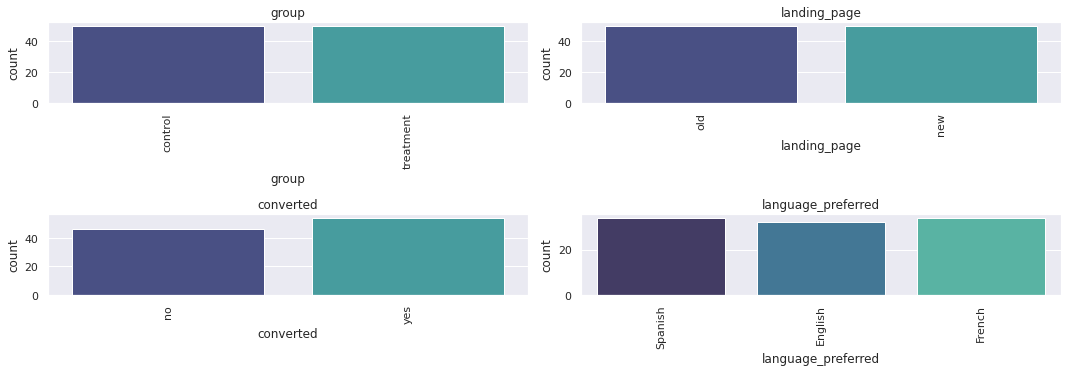

In [ ]:
#Ploting a countplot for all categorical features

plt.figure(figsize=(15,5))
sns.set_theme()

for i,column in enumerate(categorical):
  plt.subplot(2, 2, i + 1)
  sns.countplot(data=df, x=df[column], palette="mako")
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()

Insights:

*  balanced dataset - all categorical features are fairly distributed

In [ ]:
#Checking % of each category

for i,column in enumerate(categorical):
  print(df[column].value_counts(normalize=True))
  print("-"*50)

control     0.500
treatment   0.500
Name: group, dtype: float64
--------------------------------------------------
old   0.500
new   0.500
Name: landing_page, dtype: float64
--------------------------------------------------
yes   0.540
no    0.460
Name: converted, dtype: float64
--------------------------------------------------
Spanish   0.340
French    0.340
English   0.320
Name: language_preferred, dtype: float64
--------------------------------------------------


Insights:

*  Just performed a double check with the % of each category and all are fairly distributed

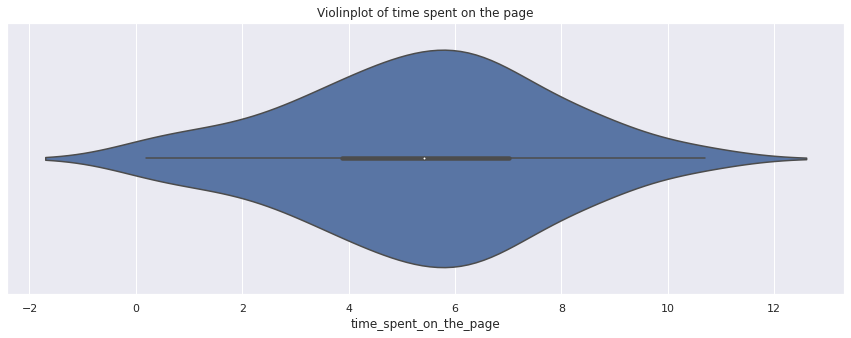

In [ ]:
#Ploting violin plot where I can check boxplot + histogram at same time

plt.figure(figsize=(15,5));
sns.violinplot(x = df['time_spent_on_the_page']);
plt.title('Violinplot of time spent on the page');

Insights

*  Fairly distributed feature
*  Very close to normal distribution

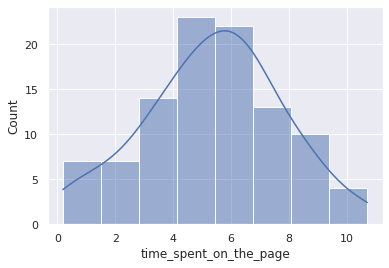

In [ ]:
#ploting stogram with KDE to visualize the distribution curve

sns.histplot(x = df['time_spent_on_the_page'], kde=True);

Insights:

* It takes form of a normal distribution

### Bivariate Analysis

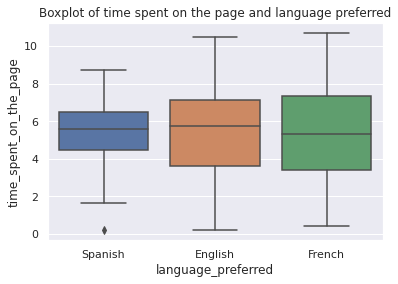

In [ ]:
sns.boxplot(y=df['time_spent_on_the_page'], x=df['language_preferred']);
plt.title('Boxplot of time spent on the page and language preferred');

Insights:



*   There are 3 languages: Spanish, English and French (all well balanced in the dataset - close to 33% each)
*   Spanish has the lower range and one observation outside the IQR (interquartile range)
*   English and French have similar ranges but english has higher median of all three languages





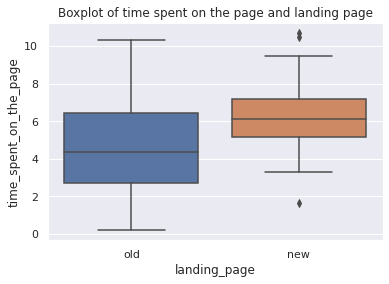

In [ ]:
sns.boxplot(y=df['time_spent_on_the_page'], x=df['landing_page']);
plt.title('Boxplot of time spent on the page and landing page');

Insights:

*   The new landing page has less range than the old landing page but has higher median.
*   The new landing page has outliers and lower IQR which indicates higher variance

I'll explore further on next graph



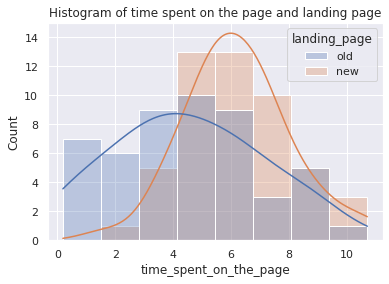

In [ ]:
sns.histplot(x=df['time_spent_on_the_page'], hue=df['landing_page'], alpha=0.3, kde=True);
plt.title('Histogram of time spent on the page and landing page');

Inights:

*   New landing page follows more closelly to a normal distribution while old landing page is right skewed and has more tail in the curve
*   The mean and average of minutes in the new old page are both higher than the mean and average of the old landing page



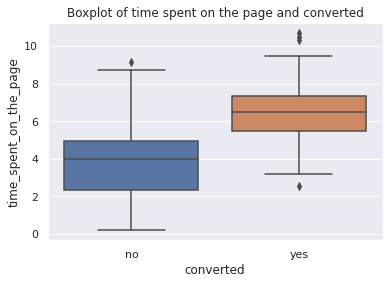

In [ ]:
sns.boxplot(y=df['time_spent_on_the_page'], x=df['converted']);
plt.title('Boxplot of time spent on the page and converted');

Insights:



*   Converted has higher median (and also higher min, 2nd quartile, 3th quartile and max) than not converted



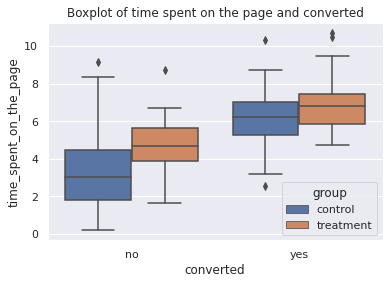

In [ ]:
sns.boxplot(y=df['time_spent_on_the_page'], x=df['converted'], hue=df['group']);
plt.title('Boxplot of time spent on the page and converted');

Insights:



*   Treatment groups have higher median and higher min, 2nd quartile, 3rd quartile and max values. Both for converted ou not converted



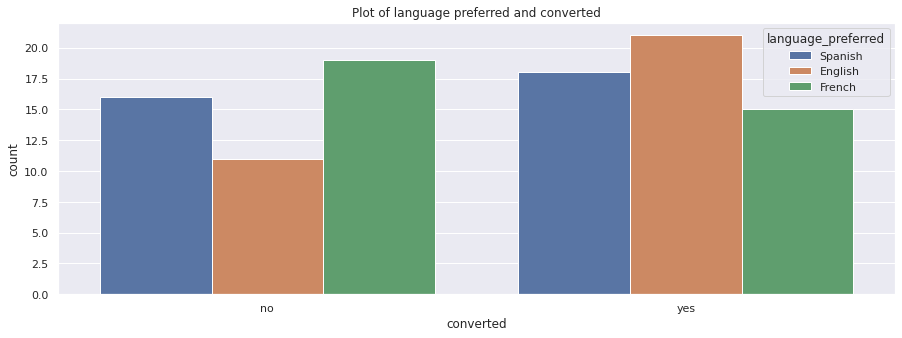

In [ ]:
#checking a little further about the conversion relation with other variables

plt.figure(figsize=(15,5))
sns.countplot(x=df['converted'], hue=df['language_preferred']);
plt.title('Plot of language preferred and converted');

Insights:



*   French is the only language that has less convertions



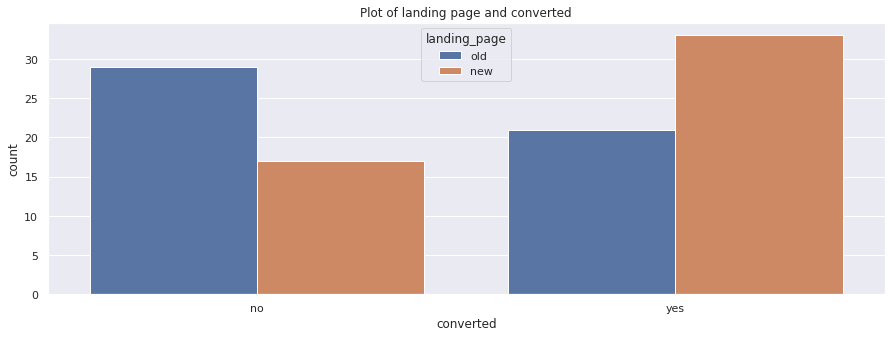

In [ ]:
#checking a little further about the conversion relation with other variables

plt.figure(figsize=(15,5))
sns.countplot(x=df['converted'], hue=df['landing_page']);
plt.title('Plot of landing page and converted');

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

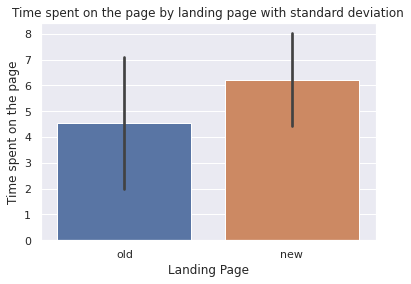

In [ ]:
#Visualizing the mean and the standard variation

sns.barplot(x=df['landing_page'], y=df['time_spent_on_the_page'], ci='sd');
plt.title('Time spent on the page by landing page with standard deviation');
plt.ylabel('Time spent on the page');
plt.xlabel('Landing Page');

Insights:



*   On average, the new landing page has higher time spent with 6 minutes against 4.5 minutes of the old landing page
*   Also old landing page presents higher standard deviation



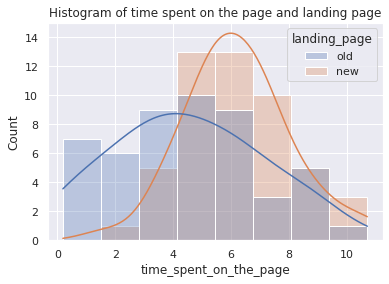

In [ ]:
#Checking the kde so we get an idea of both meaning positions

sns.histplot(x=df['time_spent_on_the_page'], hue=df['landing_page'], alpha=0.3, kde=True);
plt.title('Histogram of time spent on the page and landing page');

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


### Step 1: Define the null and alternate hypothesis

Null Hypothesys (H0): The average time spent both pages are equal

Alternative Hypothesis (Ha): The average time spent on new web page is greater than in the old landing page

### Step 2: Select Appropriate test

T-test


Assumptions:

● Continuous data

● Normally distributed populations

● Independent populations

● Random sampling from the population

### Step 3: Decide the significance level

In [ ]:
alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
#separating between old and new dataframes so we can further select the columns

old = df[df['landing_page'] == 'old']
new = df[df['landing_page'] == 'new']

In [ ]:
old.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
3,546567,control,old,3.020,no,French
5,546558,control,old,5.280,yes,English
7,546581,control,old,6.530,yes,Spanish
9,546548,control,old,2.080,no,English


In [ ]:
new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
4,546459,treatment,new,4.750,yes,Spanish
6,546448,treatment,new,5.250,yes,French
8,546461,treatment,new,10.710,yes,French


In [ ]:
old.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.000,546566.500,17.678,546493.000,546555.250,546567.500,546579.750,546592.000
time_spent_on_the_page,50.000,4.532,2.582,0.190,2.720,4.380,6.442,10.300


In [ ]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.000,546467.500,14.577,546443.000,546455.250,546467.500,546479.750,546492.000
time_spent_on_the_page,50.000,6.223,1.817,1.650,5.175,6.105,7.160,10.710


Insights:



*   Old page has higher standard deviation than the new landing page
*   Both averages and medians are close



### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new['time_spent_on_the_page'], old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is smaller than the alpha hence we can reject the null hypothesis


### Step 7:  Draw inference

We can reject the null hypothesis hence we can infer that the users spend more time on the new landing page than the old one

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
df.groupby('landing_page')['converted'].value_counts(normalize=True)

landing_page  converted
new           yes         0.660
              no          0.340
old           no          0.580
              yes         0.420
Name: converted, dtype: float64

Insights:

*   New landing page has 66% of conversion while old landing pages have 42% of conversions

Altough we cannot statistically confirm that the new landing page has higher conversion than the old landing page so i'll perform a hypothesis test



H0: conversion and landing page are independent

Ha: conversion and landing page are related

*Chi square *test

Assumptions:

Categorical variables
Expected value of the number of sample observations in each level of the variable is at least 5
Random sampling from the population


Alpha = 0.05



In [ ]:
#preparing the data

ct = pd.crosstab(df['converted'], df['landing_page'])
ct

landing_page,new,old
converted,,
no,17,29
yes,33,21


In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(ct)
print('The p-value is', p_value)

The p-value is 0.02730889175492232


In [ ]:
#printing the statement

if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is smaller than the alpha hence we can reject the null hypothesis


We can reject the null hypothesis hence we can assume that conversion and landing page are related

## 3. Is the conversion and preferred language are independent or related?

To answer this question we will need to perform a statisticall test.

First i'll formulate both hypothesis:

H0: conversion and preferred language are independent

Ha: conversion and preferred language are related

Chi square test:

Assumptions:

*   Categorical variables
*   Expected value of the number of sample observations in each level of the variable is at least 5
*   Random sampling from the
population

----------------------------------

Alpha = 0.05

In [ ]:
#preparing the data

ct = pd.crosstab(df['converted'], df['language_preferred'])
ct

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(ct)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [ ]:
#printing the statement

if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis 


We failed to reject the null hypothesis hence we can assume that the converted and language are related

## 4. Is the time spent on the new page same for the different language users?

H0: the time spent on the new page is same for different languages ( $H_0:\mu_1 = \mu_2 = \mu_3$)

Ha: the time spent on the new page is different for at least one language


alpha = 0.05

In [ ]:
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

language_preferred
English   5.559
French    5.253
Spanish   5.332
Name: time_spent_on_the_page, dtype: float64


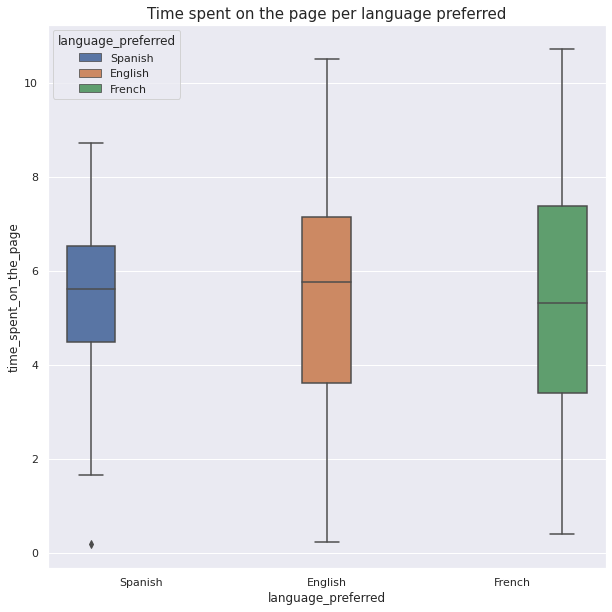

In [ ]:
#undertanding the medians and relations

print(df.groupby('language_preferred')['time_spent_on_the_page'].mean())

fig, ax = plt.subplots(figsize = (10,10))
a = sns.boxplot(x='language_preferred', y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred')
a.set_title("Time spent on the page per language preferred", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked.

*   For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
*   For equality of variance, Levene test is applied to the response variable.

We will test the null hypothesis

H0:  Time spent on the page follows a normal distribution against

against the alternative hypothesis

Ha:  Time spent on the page does not follow a normal distribution

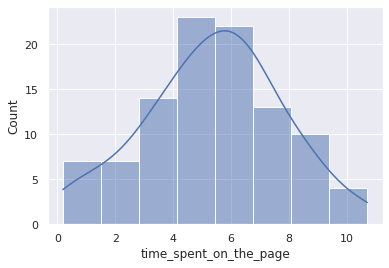

In [ ]:
#checking the curve
sns.histplot(x=df['time_spent_on_the_page'], kde=True);

In [ ]:
# Assumption 1: Normality
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


In [ ]:
#printing the statement

if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis 


Insights:

We failed to reject the null hyposthesis hence we can assume that we have a normal distribution

Lavene test for Homogeneity of Variance

Levene’s test

𝐻0 : All the population variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [ ]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


In [ ]:
#printing the statement

if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis 


We failed to reject the null hypothesis hence we can assume that the variances are equal so let's continue the hypothesis testing

In [ ]:
English = df[df['language_preferred']=="English"]['time_spent_on_the_page']
French = df[df['language_preferred']=='French']['time_spent_on_the_page']
Spanish = df[df['language_preferred']=='Spanish']['time_spent_on_the_page'] 

In [ ]:
#Generating p-value
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(English, French, Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


In [ ]:
#printing the statement

if p_value >= alpha:
  print('The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis ')
else: print('The p-value is smaller than the alpha hence we can reject the null hypothesis')

The p-value is greater or equal than the alpha hence we failed to reject the null hypothesis 


We failed to reject the H0 hence we can assume that the time spent on page is the same for the different languages

## Conclusion and Business Recommendations

**Insights:**

* There are 3 languages: Spanish, English and French (all well balanced in the dataset - close to 33% each)
* Spanish has the lower range and one observation outside the IQR (interquartile range)
* English and French have similar ranges but english has higher median of all three languages
* The new landing page has less range than the old landing page but has higher median.
* The new landing page has outliers and lower IQR which indicates higher variance therefore possible higher standard deviation
* New landing page follows more closelly to a normal distribution while old landing page is right skewed and has more tail in the curve
* The mean and average of minutes in the new landing page are both higher than the mean and average of the old landing page
* Converted has higher median (and also higher min, 2nd quartile, 3th quartile and max) than not converted
* Treatment groups have higher median and higher min, 2nd quartile, 3rd quartile and max values. Both for converted ou not converted

**Hypothesis tests results:**

1. Do the users spend more time on the new landing page than the existing landing page?
 
We have enough statistical evidence to assume that the users spend more time on the new landing page than in the old one

-------------------------
 
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

We have enough statistical evidence to assume that conversion and landing page are related
 
-------------------------

3. Is the conversion and preferred language are independent or related?
 
We have enough statistical evidence to assume that the conversions and language preferred are related
 
-------------------------

4. Is the time spent on the new page same for the different language users?
 
We have enough statistical evidence to assume that the time spent on page is the same for the different languages

-------------------------

**Business Recomendations**:

*  The new landpage have higher time spent, which might indicate that the new design is more attractive and/or helpfull for the users. So this same change of design could also be applyed to other pages in the portal
*  We don't have statistical evidence that there's a relation between languages and conversion, so the conversion must be affected by other variables. It's worth to continue seeking those variables in order to understand the relationship of those variables and increase conversions
* Would be importante to map the changes between old and new variables and perform some new hypothesis testing or even another EDA with the comparation between to pages to understand and try to infer which changes generated more time spent and more conversions
* By looking at the boxplots time spent and conversions seems to have some kind of relationship, we could perform an additional hypothesis test to have statistical validation of this hypothesis.



___